# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_key import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# Set query information
url = "http://api.openweathermap.org/data/2.5/weather?"


# Build query URL
query_url = url + "&APPID=" + api_key + "&q=" 



In [4]:
# Create counters that will increment in the API data pull
record_count = 1
set_count = 1

# Create a list that will hold the API data returns
response_list = []

In [5]:
#Start API calls 
print("Start data pull")

for x in cities:
    query_url = url + "appid=" + api_key + "&q=" + x
    weather_response = requests.get(query_url).json()
    time.sleep(2)
      
    try:
        response_list.append(weather_response)
        print(f"Processing Record {record_count} of Set {set_count} | {weather_response['name']}")

        record_count = record_count + 1
        if record_count == 51:
            set_count = set_count + 1
            record_count = 1    
    except (KeyError, IndexError, NameError):
        print("City not found. SKIP.")
        response_list.remove(weather_response)
    

Start data pull
Processing Record 1 of Set 1 | Esperance
Processing Record 2 of Set 1 | Ushuaia
City not found. SKIP.
Processing Record 3 of Set 1 | Bredasdorp
Processing Record 4 of Set 1 | Boguchany
Processing Record 5 of Set 1 | Adrar
Processing Record 6 of Set 1 | Provideniya
Processing Record 7 of Set 1 | Saskylakh
Processing Record 8 of Set 1 | New Norfolk
City not found. SKIP.
Processing Record 9 of Set 1 | Conceicao do Araguaia
Processing Record 10 of Set 1 | Dikson
Processing Record 11 of Set 1 | Lasa
Processing Record 12 of Set 1 | Hilo
Processing Record 13 of Set 1 | Tasiilaq
City not found. SKIP.
Processing Record 14 of Set 1 | Vao
Processing Record 15 of Set 1 | Carnarvon
Processing Record 16 of Set 1 | Carauari
Processing Record 17 of Set 1 | Nantucket
Processing Record 18 of Set 1 | Hermanus
Processing Record 19 of Set 1 | Namibe
Processing Record 20 of Set 1 | Punta Arenas
Processing Record 21 of Set 1 | Moron
Processing Record 22 of Set 1 | Kodiak
Processing Record 23 

Processing Record 41 of Set 4 | Pevek
Processing Record 42 of Set 4 | Pochutla
Processing Record 43 of Set 4 | Mosquera
City not found. SKIP.
Processing Record 44 of Set 4 | Flinders
Processing Record 45 of Set 4 | Kaitangata
City not found. SKIP.
Processing Record 46 of Set 4 | Puerto Ayora
Processing Record 47 of Set 4 | Tromso
Processing Record 48 of Set 4 | La Presa
Processing Record 49 of Set 4 | Abu Kamal
Processing Record 50 of Set 4 | Belyy Yar
Processing Record 1 of Set 5 | Castro
Processing Record 2 of Set 5 | Labuhan
Processing Record 3 of Set 5 | Kenai
Processing Record 4 of Set 5 | Lichinga
Processing Record 5 of Set 5 | Beira
Processing Record 6 of Set 5 | Ancud
Processing Record 7 of Set 5 | Namtsy
Processing Record 8 of Set 5 | Kabare
Processing Record 9 of Set 5 | Northport
Processing Record 10 of Set 5 | Ilulissat
Processing Record 11 of Set 5 | Alice Springs
Processing Record 12 of Set 5 | Moose Factory
Processing Record 13 of Set 5 | Durres
Processing Record 14 of S

Processing Record 31 of Set 8 | Solnechnyy
City not found. SKIP.
Processing Record 32 of Set 8 | Zhenlai
Processing Record 33 of Set 8 | Buritizeiro
Processing Record 34 of Set 8 | Bambanglipuro
Processing Record 35 of Set 8 | Fort Saint James
Processing Record 36 of Set 8 | Turka
Processing Record 37 of Set 8 | Malangali
Processing Record 38 of Set 8 | Egvekinot
Processing Record 39 of Set 8 | Guayabal de Siquima
City not found. SKIP.
City not found. SKIP.
Processing Record 40 of Set 8 | Paso de Carrasco
Processing Record 41 of Set 8 | Cravo Norte
Processing Record 42 of Set 8 | Moranbah
Processing Record 43 of Set 8 | Nizhniy Tsasuchey
Processing Record 44 of Set 8 | Latehar
Processing Record 45 of Set 8 | Suntar
Processing Record 46 of Set 8 | Longyearbyen
Processing Record 47 of Set 8 | Lusaka
Processing Record 48 of Set 8 | Kurumkan
Processing Record 49 of Set 8 | Guerrero Negro
Processing Record 50 of Set 8 | Sabha
Processing Record 1 of Set 9 | Gobabis
Processing Record 2 of Set

Processing Record 16 of Set 12 | Sulat
City not found. SKIP.
Processing Record 17 of Set 12 | Gbarnga
Processing Record 18 of Set 12 | Ukiah
Processing Record 19 of Set 12 | Yumen
Processing Record 20 of Set 12 | Port Macquarie
Processing Record 21 of Set 12 | Tautira
Processing Record 22 of Set 12 | Cubara
City not found. SKIP.


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
print("Finished data pull")

Finished data pull


In [9]:
#View results
response_list

[{'coord': {'lon': -61.45, 'lat': 10.24},
  'weather': [{'id': 800,
    'main': 'Clear',
    'description': 'clear sky',
    'icon': '01n'}],
  'base': 'stations',
  'main': {'temp': 295.15,
   'pressure': 1014,
   'humidity': 94,
   'temp_min': 295.15,
   'temp_max': 295.15},
  'visibility': 10000,
  'wind': {'speed': 2.1, 'deg': 120},
  'clouds': {'all': 0},
  'dt': 1548820800,
  'sys': {'type': 1,
   'id': 8810,
   'message': 0.0077,
   'country': 'TT',
   'sunrise': 1548844120,
   'sunset': 1548886178},
  'id': 3573739,
  'name': 'Esperance',
  'cod': 200},
 {'coord': {'lon': -68.31, 'lat': -54.81},
  'weather': [{'id': 300,
    'main': 'Drizzle',
    'description': 'light intensity drizzle',
    'icon': '09n'}],
  'base': 'stations',
  'main': {'temp': 279.15,
   'pressure': 990,
   'humidity': 81,
   'temp_min': 279.15,
   'temp_max': 279.15},
  'visibility': 10000,
  'wind': {'speed': 11.8, 'deg': 230, 'gust': 15.9},
  'clouds': {'all': 75},
  'dt': 1548820800,
  'sys': {'type':

In [10]:
# Pull each data variable for each city from "response_list" 
city = [li['name'] for li in response_list]
cloudiness = [li['clouds']['all'] for li in response_list]
country = [li['sys']['country'] for li in response_list]
date = [li['dt'] for li in response_list]
humidity = [li['main']['humidity'] for li in response_list]
lat = [li['coord']['lat'] for li in response_list]
lon = [li['coord']['lon'] for li in response_list]
maxtemp = [(li['main']['temp_max'])*(9/5)-459.67 for li in response_list]
windspeed = [li['wind']['speed'] for li in response_list]

# Write each list of weather data variables into a dataframe.
df = pd.DataFrame({"City": city, 
                "Cloudiness": cloudiness, 
                "Country": country,
                "Date": date, 
                "Humidity": humidity,
                "Lat": lat,
                "Lng": lon,
                "Max Temp": maxtemp,
                "Wind Speed": windspeed})

# Preview the "weather_df" dataframe.
df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Esperance,0,TT,1548820800,94,10.24,-61.45,71.6000,2.10
1,Ushuaia,75,AR,1548820800,81,-54.81,-68.31,42.8000,11.80
2,Bredasdorp,92,ZA,1548820800,88,-34.53,20.04,71.6000,1.50
3,Boguchany,48,RU,1548822673,50,58.38,97.46,8.2958,3.83
4,Adrar,0,DZ,1548820800,36,27.87,-0.29,44.6000,4.60


In [11]:
#Dataframe for output
df.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

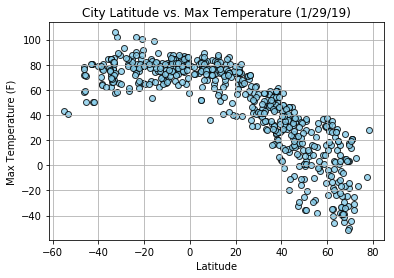

In [12]:
# Create scatterplot 
plt.scatter(lat, 
            maxtemp, 
            c="skyblue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

# Add plot title, axis labels, and grid
plt.title("City Latitude vs. Max Temperature (1/29/19)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the resulting max. temperature scatterplot
plt.savefig("maxtemp.png")


#### Latitude vs. Humidity Plot

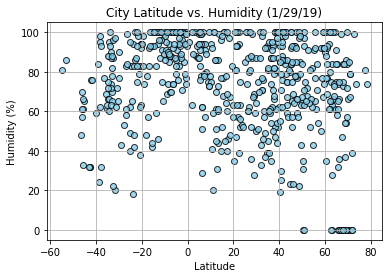

In [13]:
# Create scatterplot 
plt.scatter(lat, 
            humidity, 
            c="skyblue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

# Add plot title, axis labels, and grid
plt.title("City Latitude vs. Humidity (1/29/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("humidity.png")


#### Latitude vs. Cloudiness Plot

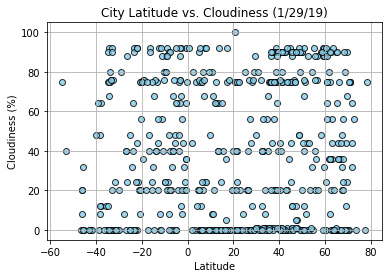

In [14]:
# Create scatterplot 
plt.scatter(lat, 
            cloudiness, 
            c="skyblue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

# Add plot title, axis labels, and grid
plt.title("City Latitude vs. Cloudiness (1/29/19)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("cloudiness.png")

#### Latitude vs. Wind Speed Plot

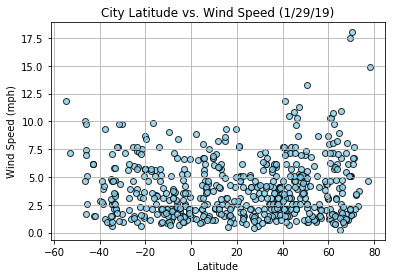

In [15]:
# Create scatterplot 
plt.scatter(lat, 
            windspeed, 
            c="skyblue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

# Add plot title, axis labels, and grid
plt.title("City Latitude vs. Wind Speed (1/29/19)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("windspeed.png")
